# 第二章 - 预备知识

In [1]:
import torch

### 创建Tensor

In [9]:
x = torch.arange(12) # 创建 0-11的一维张量
x.shape # 获取形状
x.numel() # 获取size（总元素数量）
x = x.reshape(3,4) # 改变形状

12

In [18]:
x = torch.zeros((2,3,4))
x = torch.ones((2,3,4))
x = torch.randn(3, 4) # 高斯分布 标准差为1 均值为0
x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
x

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

### Tensor运算

#### 按元素运算

In [20]:
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([1.0, 2.0, 3.0, 4.0])
x + y, x - y, x * y, x / y, x ** y # 元组

(tensor([2., 4., 6., 8.]),
 tensor([0., 0., 0., 0.]),
 tensor([ 1.,  4.,  9., 16.]),
 tensor([1., 1., 1., 1.]),
 tensor([  1.,   4.,  27., 256.]))

In [21]:
torch.exp(x) # 求幂运算

tensor([ 2.7183,  7.3891, 20.0855, 54.5981])

#### Tensor连接

In [28]:
# concatenate
x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
y = torch.tensor([[5, 6, 7, 8], [1, 2, 3, 4]])
# 0是最外维
x, y, torch.cat((x, y), dim=0), torch.cat((x, y), dim=1)

(tensor([[1, 2, 3, 4],
         [5, 6, 7, 8]]),
 tensor([[5, 6, 7, 8],
         [1, 2, 3, 4]]),
 tensor([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [5, 6, 7, 8],
         [1, 2, 3, 4]]),
 tensor([[1, 2, 3, 4, 5, 6, 7, 8],
         [5, 6, 7, 8, 1, 2, 3, 4]]))

#### 二元Tensor

In [32]:
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([1, 3, 3, 4])
x == y, (x == y).sum()

(tensor([ True, False,  True,  True]), tensor(3))

#### 广播机制

In [35]:
# 一般情况下，广播沿着长度为1的轴进行广播
x = torch.arange(3).reshape(3, 1)
y = torch.arange(2).reshape(1, 2)
# x:   y:
# 0 0  0 1
# 1 1  0 1
# 2 2  0 1
# 只有两个方向都能广播时才成立。如 3*1, 2*1 则无法实现。
x, y, x + y

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

#### 索引和切片

In [41]:
x = torch.arange(12).reshape(6, -1)
x, x[-1], x[1:3] # 这个格式的切片是左闭右开 个数为 end - start

(tensor([[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7],
         [ 8,  9],
         [10, 11]]),
 tensor([10, 11]),
 tensor([[2, 3],
         [4, 5]]))

In [43]:
x[:3, :] = 12
x

tensor([[12, 12],
        [12, 12],
        [12, 12],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

#### 节省内存

In [50]:
# 会创建新的空间
before = id(y)
y = x + y
before == id(y)

False

In [48]:
y = torch.ones((4,))
x = torch.ones((4,))
z = y
y = x + y
y, z # python中每个lable指向一个地址，lable是直接传递地址
# 如果不原地修改，会导致隐性错误

(tensor([2., 2., 2., 2.]), tensor([1., 1., 1., 1.]))

In [58]:
# 使用切片表示法来实现原地修改。
# Y[:] = <expression>
# 注意，与 Y[:]值不同，该值是拷贝
before = id(y)
y[:] = x + y
before == id(y)

True

#### 转换为其他Python对象

In [63]:
import numpy
# 这两个共享底层内存
x = torch.arange(8)
y = x.numpy()

# 这个是拷贝
z = torch.tensor(y)

x[0] = 1
x, y, z

(tensor([1, 1, 2, 3, 4, 5, 6, 7]),
 array([1, 1, 2, 3, 4, 5, 6, 7]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7]))

In [66]:
x = torch.arange(8)
int(x[0])

0

### 数据预处理

In [68]:
# 先创建一个人工数据集
import os
os.makedirs(os.path.join('.', 'data'), exist_ok=True) # exist_ok True->若目录存在，不抛出异常
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')  

In [71]:
import pandas as pd

In [93]:
data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [97]:
# 处理缺失值
inputs, outputs = data.iloc[:, :2], data.iloc[:, 2]
inputs.iloc[:, 0] = inputs.iloc[:, 0].fillna(inputs.iloc[:, 0].mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [110]:
# 将类别值和离散值处理
# 生成one-hot格式，默认nan会被忽略，这里保留nan为合法类别
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs.values

array([[3.0, True, False],
       [2.0, False, True],
       [4.0, False, True],
       [3.0, False, True]], dtype=object)

In [112]:
# 转换为张量
x, y = torch.tensor(inputs.values.astype(float)), torch.tensor(outputs.values)
x, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### 线性代数

In [114]:
# 标量->只有一个元素的张量
x = torch.tensor(3.0)
x

tensor(3.)

In [116]:
# 向量
x = torch.arange(4)
x, len(x), x.shape

(tensor([0, 1, 2, 3]), 4, torch.Size([4]))

In [126]:
# 矩阵
A = torch.arange(20).reshape(5, 4)
B = A # 共享内存
B = A.clone() # 拷贝

A, B

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]))

In [128]:
# 哈达玛积->按元素乘法
A = torch.arange(9).reshape(3, 3)
A * A

tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])

In [140]:
# 降维求和
# 降维是直接把维度干掉,而不是压扁为1
A = torch.arange(9).reshape(3, 3)
A, A.sum(), A.sum(axis=0), A.sum(axis=1)

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor(36),
 tensor([ 9, 12, 15]),
 tensor([ 3, 12, 21]))

In [141]:
# 平均值
A = torch.arange(9, dtype=torch.float32).reshape(3, 3)
A.mean(), A.sum() / A.numel()

(tensor(4.), tensor(4.))

In [142]:
# 平均值 - 指定轴
A = torch.arange(9, dtype=torch.float32).reshape(3, 3)
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([3., 4., 5.]), tensor([3., 4., 5.]))

In [7]:
# 非降维求和
A = torch.arange(9, dtype=int).reshape(3, 3)
A.sum(axis=1), A.sum(axis=1, keepdims=True)

(tensor([ 3, 12, 21]),
 tensor([[ 3],
         [12],
         [21]]))

In [12]:
# 沿轴累积求和 - 类似于高考累计排名(算上本位次)
# cumulative sum
A = torch.arange(9, dtype=int).reshape(3, 3)
A, A.cumsum(axis=0), A.cumsum(axis=1)

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[ 0,  1,  2],
         [ 3,  5,  7],
         [ 9, 12, 15]]),
 tensor([[ 0,  1,  3],
         [ 3,  7, 12],
         [ 6, 13, 21]]))

In [15]:
# 点积 - 相同未知按元素乘积和
# 专门为向量定制的运算
x = torch.arange(9, dtype=int)
torch.dot(x, x), (x * x).sum()

(tensor(204), tensor(204))

In [19]:
# 矩阵-向量积 matrix-vector product
# 实际上就是矩阵乘法
# 为了代码的清晰性,并且有特定优化
A = torch.arange(9, dtype=int).reshape(3, 3)
x = torch.arange(3)

A, x, torch.mv(A, x)

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([0, 1, 2]),
 tensor([ 5, 14, 23]))

In [21]:
# 矩阵乘法 matrix-matrix multiplication
# 注: 不要与哈达玛积和点积混淆
# 积: 矩阵乘法, 哈达玛积, 点积
x = torch.arange(9, dtype=int).reshape(3, 3)
torch.mm(x, x)

tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])

In [25]:
# L2范数 - 对向量分量大小的度量
# 一般范数就是指L2范数
# L2范数->欧几里得距离->平方和的二分之一次幂
u = torch.arange(9, dtype=float)
torch.norm(u)

tensor(14.2829, dtype=torch.float64)

In [27]:
# L1范数
# 元素的绝对值之和
# 与L2范数相比,L1范数受异常值影响较小
u = torch.arange(9, dtype=float)
torch.abs(u).sum() # absolute value

tensor(36., dtype=torch.float64)

### 微积分

In [30]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


### 自动微分

#### 最终函数为标量

In [8]:
# 请求梯度
x = torch.arange(4.0, requires_grad=True)
# x.requires_grad_(True)
print(x.grad)

None


In [16]:
# 计算并反向传播
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0., 24., 48., 72.])

In [20]:
# 清除梯度再次计算
# 默认情况下会累计梯度
x.grad.zero_()

y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

#### 最终函数为矩阵

In [28]:
x = torch.arange(4.0, requires_grad=True)
y = torch.arange(4.0).T
z = x * y

# 直接使用backward则只能对标量函数使用,否则必须传递上层关于自身的梯度
# 这里求和与传递1无差->类似全微分方程
z.backward(torch.ones(len(x)))
# z.sum().backward()

x.grad

tensor([0., 1., 2., 3.])

#### 分离计算

In [43]:
# 原始计算
x = torch.arange(4.0, requires_grad=True)

# 当x请求梯度时,y和z也会请求梯度
y = x * x
z = y * x

z.sum().backward()
x.grad

tensor([ 0.,  3., 12., 27.])

In [44]:
# 分离计算->希望计算y的梯度,并且该梯度不流回x
# 即在y被计算后希望在反向传播时将y当常数看待

# detach
# 返回一个切断梯度的张量 -> 共享底层数据,且该张量不请求梯度
x = torch.arange(4.0, requires_grad=True)

y = x * x
u = y.detach() # 切断梯度
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

#### 控制流的梯度计算

In [55]:
# 在Python标准中,推荐是不对判断语句加括号(其他语言必须加)
# 分段线性函数
def f(a):
    b = 2 * a
    while b.norm() < 1000:
        b = 2 * b
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)

d = f(a)
d.backward()

a.grad == d / a

tensor(False)

### 概率

In [62]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [61]:
# 多项分布抽样
fair_probs = torch.ones([6], dtype=torch.float32) / 6
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1620, 0.1680, 0.1730, 0.1750, 0.1670, 0.1550])

### 查阅文档

In [65]:
# 查找模块中所有函数和类
# 通常可以忽略下划线开头的属性
# _ 表内部函数
# __ 表特殊对象
import torch
dir(torch.distributions)

['AbsTransform',
 'AffineTransform',
 'Bernoulli',
 'Beta',
 'Binomial',
 'CatTransform',
 'Categorical',
 'Cauchy',
 'Chi2',
 'ComposeTransform',
 'ContinuousBernoulli',
 'CorrCholeskyTransform',
 'CumulativeDistributionTransform',
 'Dirichlet',
 'Distribution',
 'ExpTransform',
 'Exponential',
 'ExponentialFamily',
 'FisherSnedecor',
 'Gamma',
 'GeneralizedPareto',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfNormal',
 'Independent',
 'IndependentTransform',
 'InverseGamma',
 'Kumaraswamy',
 'LKJCholesky',
 'Laplace',
 'LogNormal',
 'LogisticNormal',
 'LowRankMultivariateNormal',
 'LowerCholeskyTransform',
 'MixtureSameFamily',
 'Multinomial',
 'MultivariateNormal',
 'NegativeBinomial',
 'Normal',
 'OneHotCategorical',
 'OneHotCategoricalStraightThrough',
 'Pareto',
 'Poisson',
 'PositiveDefiniteTransform',
 'PowerTransform',
 'RelaxedBernoulli',
 'RelaxedOneHotCategorical',
 'ReshapeTransform',
 'SigmoidTransform',
 'SoftmaxTransform',
 'SoftplusTransform',
 'StackTransform',
 'Sti

In [66]:
# 查找特定函数和类的用法
help(torch.distributions.Multinomial)

Help on class Multinomial in module torch.distributions.multinomial:

class Multinomial(torch.distributions.distribution.Distribution)
 |  Multinomial(total_count: int = 1, probs: Optional[torch.Tensor] = None, logits: Optional[torch.Tensor] = None, validate_args: Optional[bool] = None) -> None
 |
 |  Creates a Multinomial distribution parameterized by :attr:`total_count` and
 |  either :attr:`probs` or :attr:`logits` (but not both). The innermost dimension of
 |  :attr:`probs` indexes over categories. All other dimensions index over batches.
 |
 |  Note that :attr:`total_count` need not be specified if only :meth:`log_prob` is
 |  called (see example below)
 |
 |  .. note:: The `probs` argument must be non-negative, finite and have a non-zero sum,
 |            and it will be normalized to sum to 1 along the last dimension. :attr:`probs`
 |            will return this normalized value.
 |            The `logits` argument will be interpreted as unnormalized log probabilities
 |        

# 第三章 - 线性神经网络

### 正态分布

In [7]:
import math
import numpy as np
from d2l import torch as d2l

In [2]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp((-0.5 / sigma**2) * (x - mu)**2)

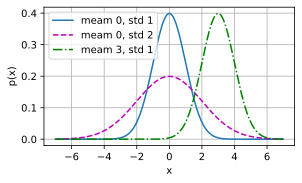

In [11]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
    ylabel='p(x)', figsize=(4.5, 2.5),
    legend=[f'meam {mu}, std {sigma}' for mu, sigma in params])


### 构造线性模型

In [37]:
import torch
import random
from d2l import torch as d2l

#### 生成数据集

In [23]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b # 不管你是行向量还是列向量,自动处理掉
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4]) # 行向量
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

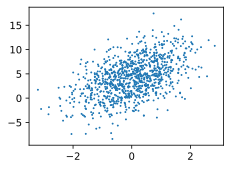

In [31]:
# import torch
# X = torch.randn(5, 3)

# # 这些都一样,取第1列,降维成1维
# X[:, 1]
# X[:, (1)]

# # 这些一样,取第1列,保持2维
# X[:, [1]]
# X[:, 1:2]

# 小括号降维,中括号保留维度.
d2l.set_figsize()
d2l.plt.scatter(features[:,(0)].detach().numpy(), labels.detach().numpy(), 1)

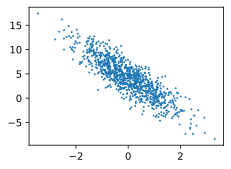

In [32]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy(), 1)

#### 读取数据集

In [39]:
# 注: Python列表切片是拷贝, numpy和torch切片是视图
# 该函数仅适合教学.其效率低下,需要将数据全部读入内存,并且需要大量的随机内存访问
# 随机读取会导致CPU缓存失效

def data_iter(batch_size, features, labels):
    num_examples = len(features) # len只返回 axis=0 的大小
    indices = list(range(num_examples))

    random.shuffle(indices) # 原地打乱
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            # 保留尾部数据
            indices[i: min(i + batch_size, num_examples)]
        )
        # yield是一个生成器,使得该函数变成一个迭代器.如 for ... in ... 和 next() 
        yield features[batch_indices], labels[batch_indices]

In [38]:
for X, y in data_iter(10, features, labels):
    print(X, '\n', y)

tensor([[-0.3045, -0.7616],
        [-0.1979,  2.4022],
        [-0.6509,  2.3990],
        [-0.3514,  1.1681],
        [ 1.8204, -1.1327],
        [ 0.0166, -0.8453],
        [ 0.8786,  2.4243],
        [-1.3798, -1.1334],
        [-0.8250,  1.4925],
        [ 0.9304, -1.5977]]) 
 tensor([[ 6.1838],
        [-4.3712],
        [-5.2458],
        [-0.4918],
        [11.6844],
        [ 7.1033],
        [-2.2912],
        [ 5.2935],
        [-2.5400],
        [11.5026]])
tensor([[ 2.6414e-02, -8.6533e-01],
        [ 6.5772e-01,  8.8212e-01],
        [-9.0559e-01, -3.1047e-01],
        [-6.2442e-01, -1.1156e+00],
        [ 1.0082e-01,  3.4347e-01],
        [-7.4231e-01,  1.7240e-05],
        [-1.0339e-01, -2.6702e-01],
        [ 7.3352e-01, -5.2078e-01],
        [-1.0066e+00, -2.2470e-01],
        [-1.3929e+00, -5.0766e-02]]) 
 tensor([[7.2172],
        [2.5132],
        [3.4455],
        [6.7266],
        [3.2393],
        [2.7178],
        [4.8873],
        [7.4292],
        [2.9594],
 

#### 构造模型

In [54]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y)**2 / 2

# 定义优化算法
def sgd(params, lr, batch_size):
    # 这里的梯度不会回传,但Pytorch会为所有require grad的张量创建计算图.
    # no_grad可以节省内存并提高速度
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # 务必注意对batch_size的规范化
            param.grad.zero_()

#### 训练

In [55]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.042139
epoch 2, loss 0.000161
epoch 3, loss 0.000050


#### 估计误差

In [57]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')
print(true_w.shape, w.shape)

w的估计误差: tensor([-0.0002, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0005], grad_fn=<RsubBackward1>)
torch.Size([2]) torch.Size([2, 1])


#### 绘制拟合图像

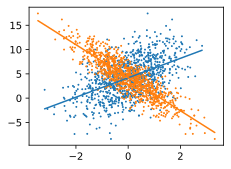

In [65]:
d2l.set_figsize()
d2l.plt.plot(features[:, 0].numpy(), (features[:, 0] * w[0][0] + b).detach().numpy())
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

d2l.set_figsize()
d2l.plt.plot(features[:, 1].numpy(), (features[:, 1] * w[1][0] + b).detach().numpy())
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

### 通过框架构建线性回归

In [5]:
import torch
import numpy as np
from torch.utils import data
from d2l import torch as d2l

#### 生成数据集

In [10]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b # 不管你是行向量还是列向量,自动处理掉
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4]) # 行向量
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

#### 读取数据集

In [8]:
def load_array(data_arrays, batch_size, is_train=True):
    # *号是解包运算符,将列表或元组中的元素展开作为独立的参数传递
    # DataLoader返回可迭代对象
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [11]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

#### 定义模型

In [12]:
from torch import nn

# 定义模型
# Linear线性层包括bias
net = nn.Sequential(nn.Linear(2, 1))

# 初始化参数
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 定义损失函数
# (y - y_hat)**2 求和取平均,无系数1/2
# 均方差误差 或 平方L2范数(L2范数的平方再除以n)
loss = nn.MSELoss()

# 定义优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

#### 训练

In [15]:
num_epoch = 3
for epoch in range(0, num_epoch):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    with torch.no_grad():
        l = loss(net(features), labels)
        print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000098
epoch 2, loss 0.000097
epoch 3, loss 0.000098


### 图像分类数据集

In [11]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

#### 读取数据集

In [17]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root='./data', train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='./data', train=False, transform=trans, download=True
)

# [index][data or lable]
len(mnist_train), len(mnist_test), mnist_test[0][0].shape

(60000,
 10000,
 torch.Size([1, 28, 28]),
 torchvision.datasets.mnist.FashionMNIST)

In [130]:
# idx -> name
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[idx] for idx in labels]

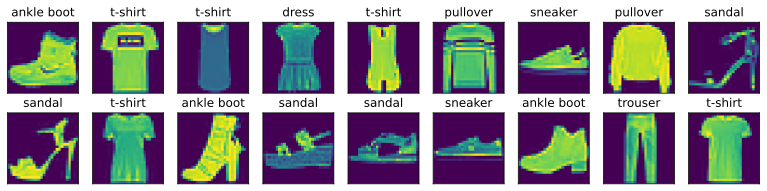

In [30]:
# 绘制图像
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale) # 与矩阵不同,这里是 宽*高

    # 整个图像对象,子图对象 axes.shape = (2, 3) -> 2行3列
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten() # 展平
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

# DataLoader是可迭代对象,但不是迭代器.可迭代对象是可以保证复用的,一般用在for ... in ...中
# next(iter)用于获取第一组值,迭代器用完就没,无法归零.
# 迭代器要用 try-except 捕获 StopIteration.
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))
pass

In [31]:
# 读取小批量

# Worker的工作原理是多线程读取数据进入队列(若有数据增强要求,也会执行数据增强)
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4)

timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'0.91 sec'

In [6]:
# 整合所有组件
def load_data_fashion_mnist(batch_size, reshape=None):
    trans = [transforms.ToTensor()]
    if(reshape):
        trans.insert(0, tansforms.Resize(resize))
    trans = transforms.Compose(trans)
    
    mnist_train = torchvision.datasets.FashionMNIST(
        root='./data', train=True, transform=trans, download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root='./data', train=False, transform=trans, download=True
    )

    # 默认每个Worker预加载2batch(prefetch_factor=2)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4),
            data.DataLoader(mnist_test, batch_size, shuffle=True, num_workers=4))

### Softmax回归

In [15]:
import torch
from IPython import display
from d2l import torch as d2l

#### 定义数据集与模型

In [112]:
# 加载数据集
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# 初始化模型参数
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [105]:
# 定义softmax回归
# 注:该softmax没有处理极端值造成的上溢或下溢
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(axis=1, keepdim=True)
    return X_exp / partition

In [106]:
# 定义模型
def net(X):
    # reshape的作用是保证传入列向量和行向量都能被正确处理 -> 注意用词"向量"
    # 传入矩阵就必须自行保证shape了
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b)

In [107]:
# 定义损失函数 - CE Loss
def cross_entropy(y_hat, y):
    # 这种选择方式是按元素选择,[:, [0, 1]]就是每行保留0,1了
    return - torch.log(y_hat[range(len(y_hat)), y])

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [9]:
# 定义精度函数 - 命中个数
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [8]:
# 评估在指定模型上的精度
# eval和no_grad都需要开启
# eval改变层的行为,如Dropout
# no_grad则关闭计算图
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [130]:
# 在没有优化前,接近于瞎猜 -> P = 0.1
evaluate_accuracy(net, test_iter)

0.8428

#### 训练

In [7]:
# 动画类
class Animator:
    # 这个类接口上支持多图,但实现上只有单图
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条直线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend
        )
        # 多重赋值
        self.X, self.Y, self.fmts = None, None, fmts
    def add(self, x, y):
        # 向图标中添加多个数据点
        if not hasattr(y, '__len__'):
            y = [y]
        n = len(y)
        if not hasattr(x, '__len__'):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla() # clear axis
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


# 训练一轮
# eval和train需要手动设置,没有RAII
# with类似RAII,class用__enter__和__exit__接住事件
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失综合,训练准确的综合,样本数
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 意义何在?? 你d2l不也是torch的自动微分吗
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回累计训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        
        # 元组相加 (a, b) + (c,) 结果是 (a, b, c)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        train_loss, train_acc = train_metrics

        # assert 不满足则抛出异常
        # assert train_loss < 0.5, train_loss
        # assert train_acc <= 1 and train_acc > 0.7, train_acc
        # assert test_acc <= 1 and test_acc > 0.7, test_acc

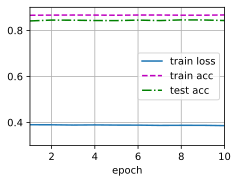

In [129]:
# 训练
lr = 0.1
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

#### 预测

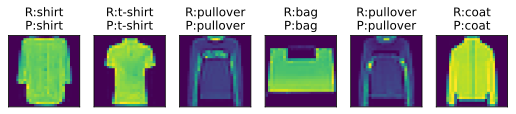

In [131]:
def predict_ch3(net, test_iter, n=6):
    # n <= batch_size
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles= ['R:' + true + '\n' + 'P:' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n]
    )
predict_ch3(net, test_iter)

### Softmax回归 - 框架版

In [134]:
import torch
from torch import nn
from d2l import torch as d2l

#### 定义模型

In [141]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# 对所有层应用初始化函数
net.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction='none')
pass

#### 训练

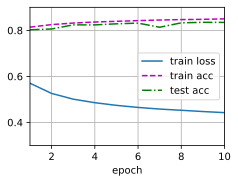

In [144]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 第四章 - 多层感知机

## 激活函数

In [64]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU - Rectified Linear Unit 修正线性单元

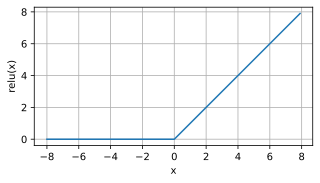

In [71]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

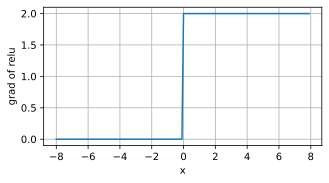

In [70]:
# 导数
y.backward(torch.ones_like(x), retain_graph=True) # 保留计算图,默认反向传播后删除计算图(在这里无意义)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

### Sigmoid - Squashing Function 挤压函数

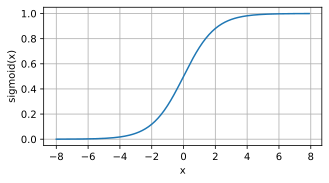

In [83]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)

d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

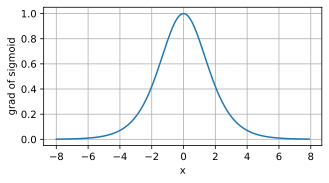

In [87]:
# 导数
y.sum().backward(retain_graph=True)

d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### Tanh - 双曲正切

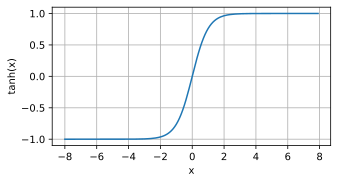

In [89]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.tanh(x)

d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

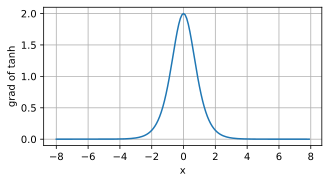

In [91]:
# 导数
y.sum().backward(retain_graph=True)

d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### pReLU - parameterized ReLU 参数化修正线性单元

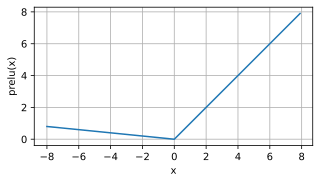

In [102]:
a = 0.1
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x) + a * torch.relu(-x)

d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(5, 2.5))

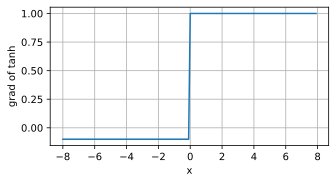

In [103]:
# 导数
y.sum().backward(retain_graph=True)

d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 对多层ReLU的验证

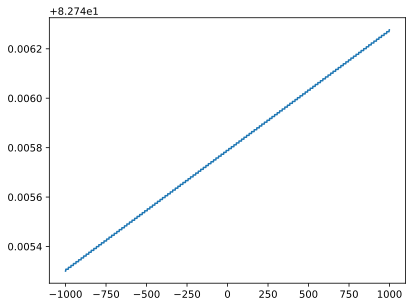

In [63]:
import torch
from d2l import torch as d2l

x_r = torch.arange(-1000, 1000, dtype=torch.float32)
x = x_r
w = torch.normal(0, 0.01, (1,), dtype=torch.float32)
b = torch.normal(100, 50, (1,), dtype=torch.float32)
x = torch.matmul(x.reshape(-1, 1), w) + b

w = torch.normal(0, 0.01, (1,), dtype=torch.float32)
b = torch.normal(100, 50, (1,), dtype=torch.float32)
x = torch.matmul(x.reshape(-1, 1), w) + b

w = torch.normal(0, 0.01, (1,), dtype=torch.float32)
b = torch.normal(100, 50, (1,), dtype=torch.float32)
x = torch.matmul(x.reshape(-1, 1), w) + b

y = x
d2l.use_svg_display()
d2l.plt.plot(x_r, y)

## 构造多层感知机

In [104]:
import torch
from torch import nn
from d2l import torch as d2l

In [122]:
# 加载数据集
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# 初始化模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

# 注册为参数,只有参数才能参与优化
W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01
)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01
)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

# 激活函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

# 模型
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(X@W1 + b1) # @表示矩阵乘法
    return(H@W2 + b2)

# 损失函数
# reduction
# -> none 返回每个样本的损失
# -> mean 返回损失均值
# -> sum 返回损失和
loss = nn.CrossEntropyLoss(reduction='none')

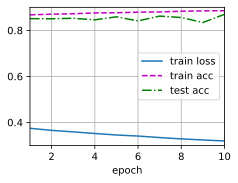

In [127]:
# 训练
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

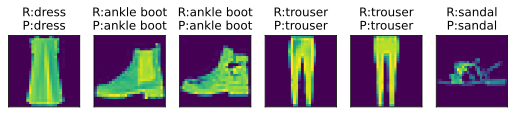

In [133]:
# 测试性能
predict_ch3(net, test_iter)

## 多层感知机的简洁实现

In [134]:
import torch
from torch import nn
from d2l import torch as d2l

In [136]:
# 模型
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [137]:
# 训练准备
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

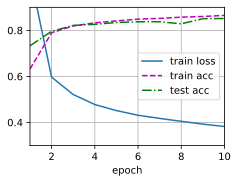

In [138]:
# 训练
train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 多项式回归 - 拟合

In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据集

In [80]:
max_degree = 20 # 多项式最大阶数
n_train, n_test = 100, 100
true_w = np.zeros(max_degree) # 一次性分配连续空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # 阶乘

# labels->(n_train + n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32)
                                           for x in [true_w, features, poly_features, labels]]

### 训练模型

In [24]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 移除偏置
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0]) # 如果数据集太小就没必要分batch了

    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])

    for epoch in range(num_epochs):
        train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                    (evaluate_loss(net, test_iter, loss))))
    print('weight:', net[0].weight.data.numpy())
    return net
    

#### 三阶多项式(正常拟合)

weight: [[ 4.997049   1.273122  -3.3801866  5.4313097]]


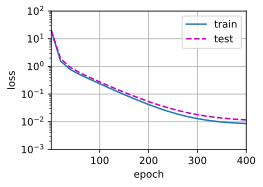

In [81]:
net = train(poly_features[:n_train, :4], poly_features[n_train:, :4], labels[:n_train], labels[n_train:])

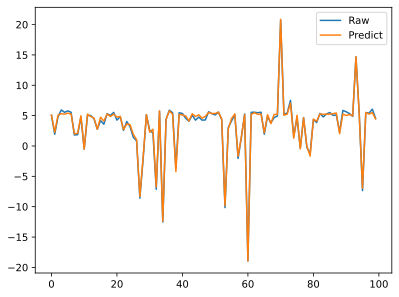

In [67]:
# 显示效果
features_ = poly_features[n_train:, :4]
y_hat = net(features_) # 模型拟合4个参数
d2l.plt.clf()
d2l.plt.plot(range(len(features_)), labels[n_train:,].detach().numpy(), label='Raw')
d2l.plt.plot(range(len(features_)), y_hat.detach().numpy(), label='Predict')
d2l.plt.legend()

#### 线性函数拟合(欠拟合)

weight: [[3.368298 3.293144]]


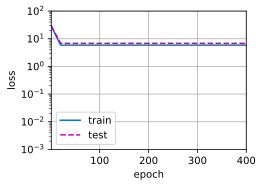

In [64]:
net = train(poly_features[:n_train, :2], poly_features[n_train:, :2], labels[:n_train], labels[n_train:])

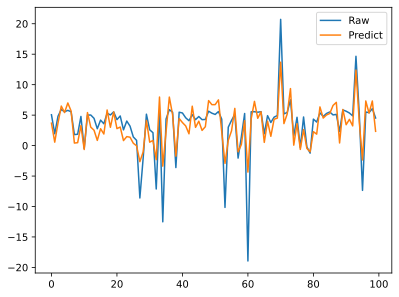

In [65]:
# 显示效果
features_ = poly_features[n_train:, :2]
y_hat = net(features_) # 模型拟合4个参数
d2l.plt.clf()
d2l.plt.plot(range(len(features_)), labels[n_train:,].detach().numpy(), label='Raw')
d2l.plt.plot(range(len(features_)), y_hat.detach().numpy(), label='Predict')
d2l.plt.legend()

#### 高阶多项式拟合(过拟合)

weight: [[ 5.004751    1.2840208  -3.3954158   5.1609373  -0.09252413  1.3887596
   0.23530954  0.1070777   0.09097713 -0.17436558 -0.03691801 -0.08195901
  -0.15877713 -0.17013474  0.19398038 -0.00990075 -0.20427157  0.03174483
  -0.04539041 -0.20373133]]


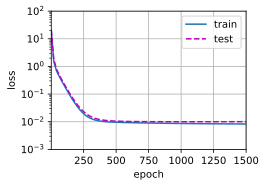

In [83]:
# 为什么和书上不一样?没有过拟合啊 -> 有一丢丢过拟合
net = train(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)

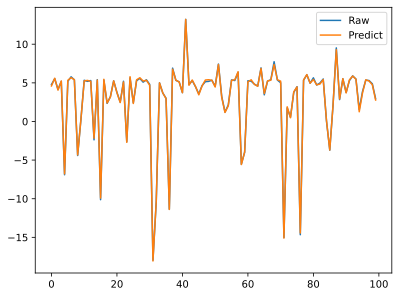

In [75]:
# 显示效果
features_ = poly_features[n_train:, :]
y_hat = net(features_) # 模型拟合4个参数
d2l.plt.clf()
d2l.plt.plot(range(len(features_)), labels[n_train:,].detach().numpy(), label='Raw')
d2l.plt.plot(range(len(features_)), y_hat.detach().numpy(), label='Predict')
d2l.plt.legend()

## 权重衰减

In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

### 高维线性回归

#### 合成数据

In [81]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_train)
test_iter = d2l.load_array(test_data, batch_size) # 这里一开始写错了,为什么有的图test与train重叠就是因为这个

#### 初始化模型参数

In [61]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    # Python中没有RAII这一说, 不需要考虑返回引用的问题
    return [w, b]

def l2_penalty(w):
    # 标量计算都是有实际意义的
    # 平方是为了使得对大分量的推力更大
    # 原始L2无论大分量还是小分量,推力是相同的
    return torch.sum(w.pow(2)) / 2

#### 训练

In [66]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 对l2_penalty进行广播
            # 每个loss都是独立的!!! 并且batch的规范化是再optim内的,因此不可以求和后再加!!!
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是:', torch.norm(w).item())
    print('w的Sum是:', w.detach().sum())

w的L2范数是: 13.549399375915527
w的Sum是: tensor(22.5269)


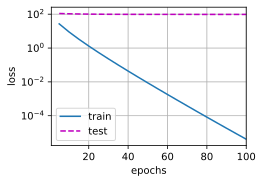

In [83]:
# 忽略正则化 直接训练
train(lambd=0)

w的L2范数是: 3.850729465484619
w的Sum是: tensor(2.7388)


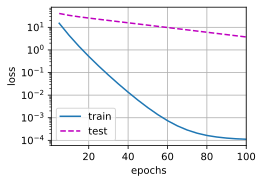

In [82]:
# 启用正则化 直接训练
train(lambd=1)

### 简洁实现

In [76]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003

    # optim默认对bias也做权重衰减,那么手动设置权重衰减
    trainer = torch.optim.SGD([
        {'params': net[0].weight, 'weight_decay': wd},
        {'params': net[0].bias}
    ], lr=lr)

    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是:', torch.norm(net[0].weight).item())
    print('w的Sum是:', net[0].weight.detach().sum())

w的L2范数是: 13.059173583984375
w的Sum是: tensor(7.3220)


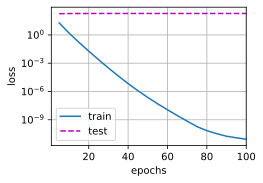

In [85]:
# 无正则化
train_concise(0)

w的L2范数是: 0.4007149040699005
w的Sum是: tensor(-0.6219)


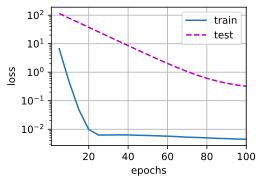

In [84]:
# 正则化
train_concise(3)

## 暂退法 Dropout

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
def dropout_layer(X, dropout):
    # dropout 是丢弃率
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    
    # [0,1)服从均匀分布
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1 - dropout)

X = torch.arange(16, dtype=torch.float32).reshape((2, 8))
dropout_layer(X, 0.5)

tensor([[ 0.,  2.,  0.,  6.,  0., 10.,  0.,  0.],
        [ 0.,  0., 20., 22.,  0., 26.,  0., 30.]])

### 组建模型

In [17]:
# 定义参数
num_inputs, num_outputs, num_hidden1, num_hidden_2 = 784, 10, 256, 256

# 定义模型
dropout1, dropout2 = 0.2, 0.5
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hidden1, num_hidden2,
                 is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hidden1)
        self.lin2 = nn.Linear(num_hidden1, num_hidden2)
        self.lin3 = nn.Linear(num_hidden2, num_outputs)
        self.relu = nn.ReLU()
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape(-1,num_inputs)))
        if self.training:
            H1 = dropout_layer(H1, dropout1)

        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, dropout2)

        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hidden1, num_hidden_2)

### 训练

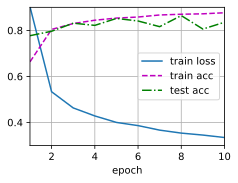

In [18]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 简洁实现

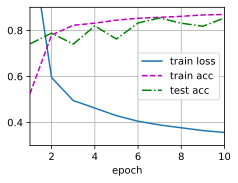

In [22]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, std=0.01)

net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(dropout1),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Dropout(dropout2),
    nn.Linear(256, 10),
)
net.apply(init_weights)

loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 计算图